In [32]:
import pandas as pd
from pathlib import Path

df = pd.DataFrame([str(i) for i in list(Path("2_docking/").rglob("*.pdbqt"))])
df.columns = ['file']

In [33]:
import re
from rdkit import Chem
from rdkit.Chem import AllChem

def get_first_mol_from_pdbqt(file, score_only=False):
    mol_block = ""
    score = None
    smiles = ""
    with open(file, 'r') as f:
        for i, line in enumerate(f):
            if i == 1:
                finds = re.findall(r"REMARK VINA RESULT:\s+([0-9\-.]+)", line)
                if finds != []:
                    score = float(finds[0])

            if line.startswith("REMARK SMILES") and 'IDX' not in line:
                line_ = line.strip().split()
                smiles = line_[2]
    if score_only:
        return score
    return smiles, score

In [34]:
df['score'] = df['file'].apply(lambda x: get_first_mol_from_pdbqt(x, score_only=True))

In [35]:
df['file'] = df['file'].apply(lambda x: x.split('/')[-1])
df.columns = ['file','diffdock_score']

In [36]:
df2 = pd.DataFrame([str(i) for i in list(Path("../../2_vina_docking/2_docking/").rglob("*.pdbqt"))])
df2.columns = ['file']

In [38]:
df2[['smiles', 'score']] = df2['file'].apply(lambda x: pd.Series(get_first_mol_from_pdbqt(x)))
df2['file'] = df2['file'].apply(lambda x: x.split('/')[-1])
df2.columns = ['file', 'smiles', 'vina_score']

In [39]:
# Merge the two DataFrames based on the 'ID' column
merged_df = pd.merge(df, df2, on='file', how='inner')

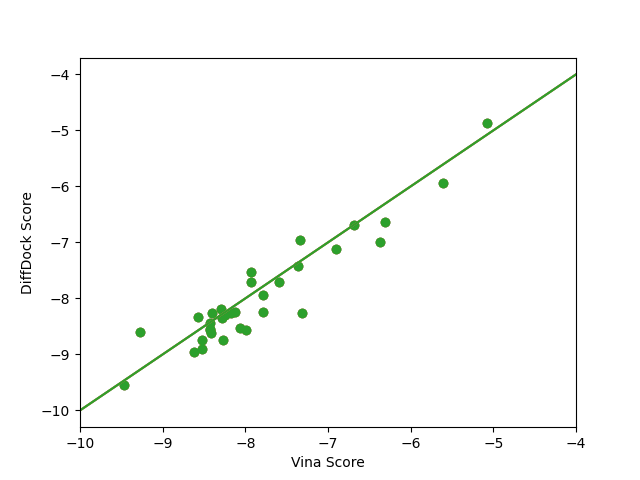

In [40]:
%matplotlib widget
import matplotlib.pyplot as plt

plt.scatter(merged_df['diffdock_score'], merged_df['vina_score'])
# Define the x-values
x = list(range(-10, -3))

# Plot the line
plt.plot(x, x)
plt.xlabel("Vina Score")
plt.ylabel("DiffDock Score")
plt.xlim(-10, -4)  
plt.show()